**1. Import Essential Libraries**

In [4]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

**2. Load the Data**

In [5]:
df = pd.read_excel("E:\\Machine Learning\\global_superstore\\Global Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


**3. Basic Analysis of Data**

In [6]:
df.shape

(51290, 24)

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [9]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [10]:
df = df.drop(columns = ['Postal Code'], axis = 1)

In [11]:
df = df.drop(columns = ['Row ID','Order ID', 'Customer ID', 'Product ID', 'Order Date', 'Ship Date'], axis = 1)

**4. Correlation of columns with target column**

In [12]:
df_num = df.select_dtypes(include = [np.number])
print(df_num.columns)
print("--------------------------------------------------")

df_cat = df.select_dtypes(include = ['object'])
print(df_cat.columns)

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')
--------------------------------------------------
Index(['Ship Mode', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')


* The below code describe the correlation of numerical columns with target column in this the numerical columns which deviates the target column are shown in the df_num_list

In [13]:
df_num_corr = df_num.corr()

df_num_list = []
df_num_list.extend(df_num_corr[(df_num_corr['Profit']> 0.3)].index.values)
df_num_list.extend(df_num_corr[(df_num_corr['Profit']<-0.3)].index.values)

In [14]:
df_num_list

['Sales', 'Profit', 'Shipping Cost', 'Discount']

* For categorical columns the correlation is measured through one way anova test in which each columns "p-values" shows the importance of column in the correlation.

In [15]:
from scipy.stats import f_oneway

In [16]:
df_cat["P"] = df_num["Profit"]

In [17]:
influence_list = []
noninfluence_list = []

for influence1 in list (df_cat.columns):
    if influence1 == 'P':
        continue
    else:
        groups  = [df_cat ['P'][df_cat[influence1] == category] for category in df_cat[influence1].unique()]
        f_stat, p_value = f_oneway(*groups)
        print(f"columns : {influence1} , F-stat : {f_stat} , P-value : {p_value}")
        if p_value < 0.05:
            influence_list.append(influence1)
        else:
            noninfluence_list.append(influence1)

columns : Ship Mode , F-stat : 0.1112694400346025 , P-value : 0.953549120213493


columns : Customer Name , F-stat : 1.1538436569505661 , P-value : 0.0017954686365357188
columns : Segment , F-stat : 0.22119237404323483 , P-value : 0.8015632303031714
columns : City , F-stat : 2.164422870379703 , P-value : 1.9283854765863786e-276
columns : State , F-stat : 4.709630866402644 , P-value : 0.0
columns : Country , F-stat : 22.25802770920221 , P-value : 0.0
columns : Market , F-stat : 28.07818874959561 , P-value : 1.0834601137634787e-33
columns : Region , F-stat : 34.26121568235655 , P-value : 3.617471983600004e-80
columns : Category , F-stat : 304.50613538510225 , P-value : 3.4173111634965594e-132
columns : Sub-Category , F-stat : 103.91551183097653 , P-value : 0.0
columns : Product Name , F-stat : 5.533698195429955 , P-value : 0.0
columns : Order Priority , F-stat : 1.461514297034312 , P-value : 0.22283640166560595


In [18]:
influence_list

['Customer Name',
 'City',
 'State',
 'Country',
 'Market',
 'Region',
 'Category',
 'Sub-Category',
 'Product Name']

In [19]:
noninfluence_list

['Ship Mode', 'Segment', 'Order Priority']

**5. Visualizaton of Data**

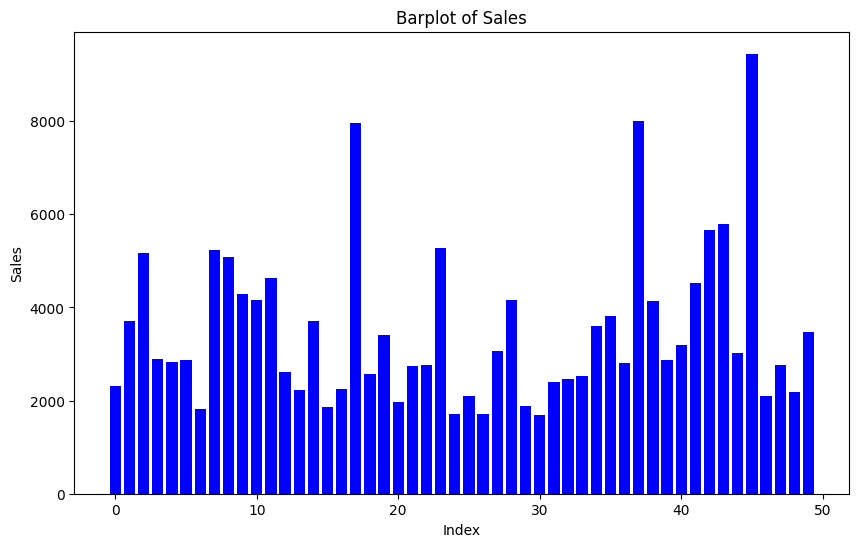

In [20]:
plt.figure(figsize = (10,6))
plt.bar(df.index[:50], df['Sales'][:50], color = 'blue')
plt.title('Barplot of Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()

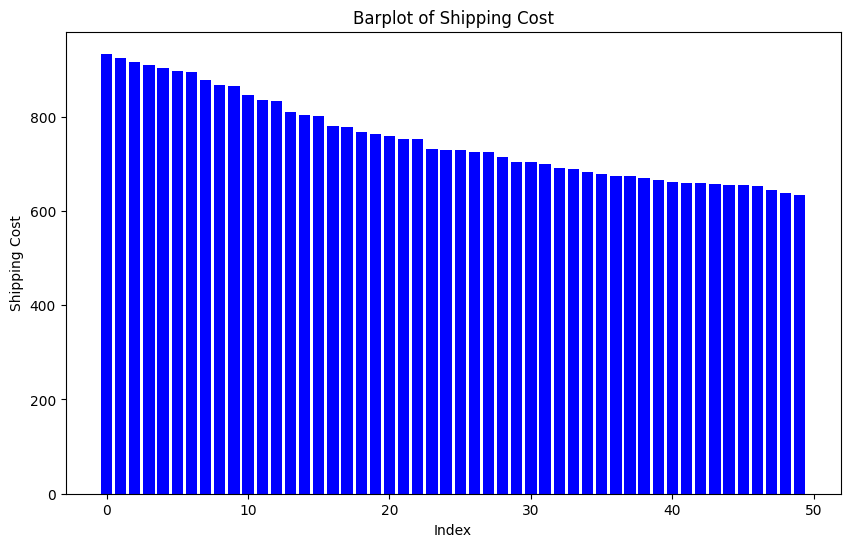

In [21]:
plt.figure(figsize = (10,6))
plt.bar(df.index[:50], df['Shipping Cost'][:50], color = 'blue')
plt.title('Barplot of Shipping Cost')
plt.xlabel('Index')
plt.ylabel('Shipping Cost')
plt.show()

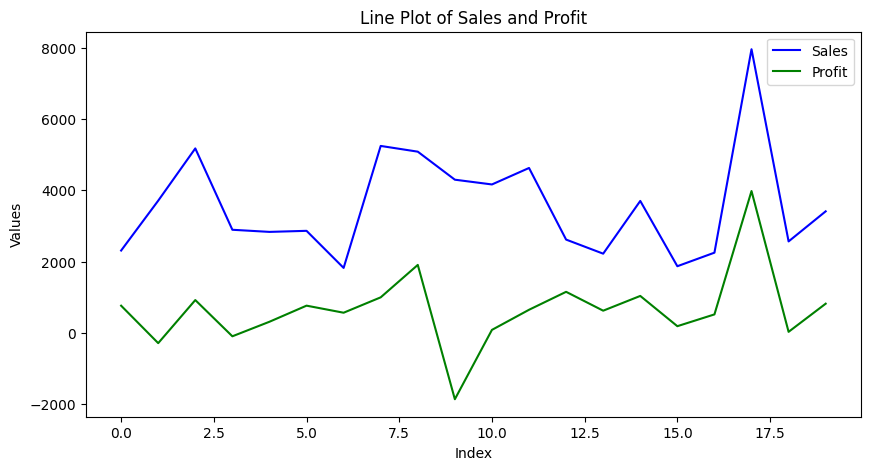

In [22]:
plt.figure(figsize=(10,5))
plt.plot(df['Sales'][:20], label = 'Sales', color = 'blue')
plt.plot(df['Profit'][:20], label = 'Profit', color = 'green')
plt.title("Line Plot of Sales and Profit")
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

C:\Users\gkris\AppData\Local\Temp\ipykernel_2688\1406848731.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Sales'], df['Profit']], labels = ['Sales', 'Profit'])


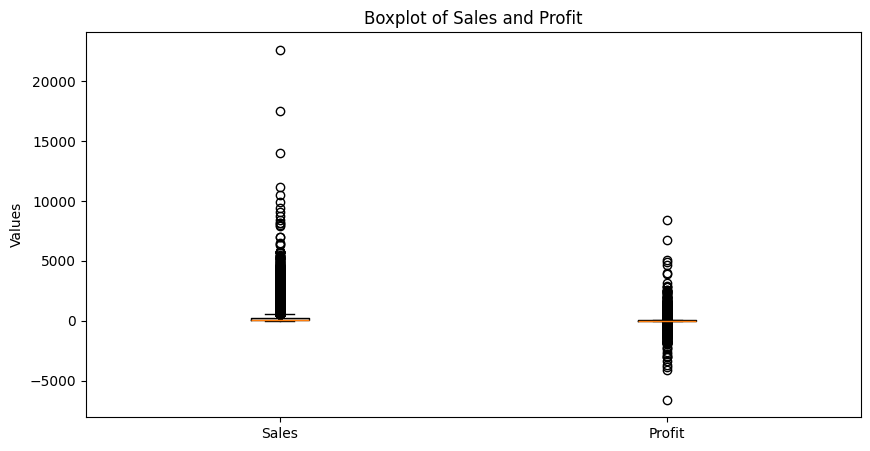

In [23]:
plt.figure(figsize = (10,5))
plt.boxplot([df['Sales'], df['Profit']], labels = ['Sales', 'Profit'])
plt.title('Boxplot of Sales and Profit')
plt.ylabel('Values')
plt.show()

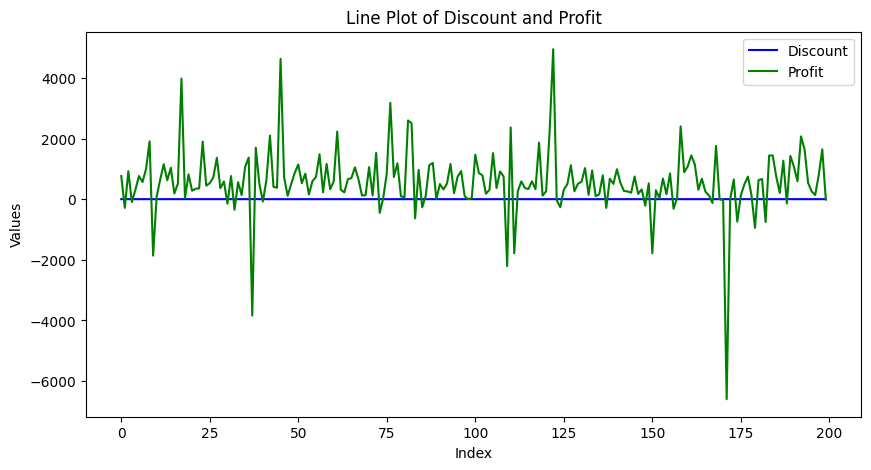

In [24]:
plt.figure(figsize=(10,5))
plt.plot(df['Discount'][:200], label = 'Discount', color = 'blue')
plt.plot(df['Profit'][:200], label = 'Profit', color = 'green')
plt.title("Line Plot of Discount and Profit")
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

C:\Users\gkris\AppData\Local\Temp\ipykernel_2688\1034464194.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Discount'], df['Profit']], labels = ['Discount', 'Profit'])


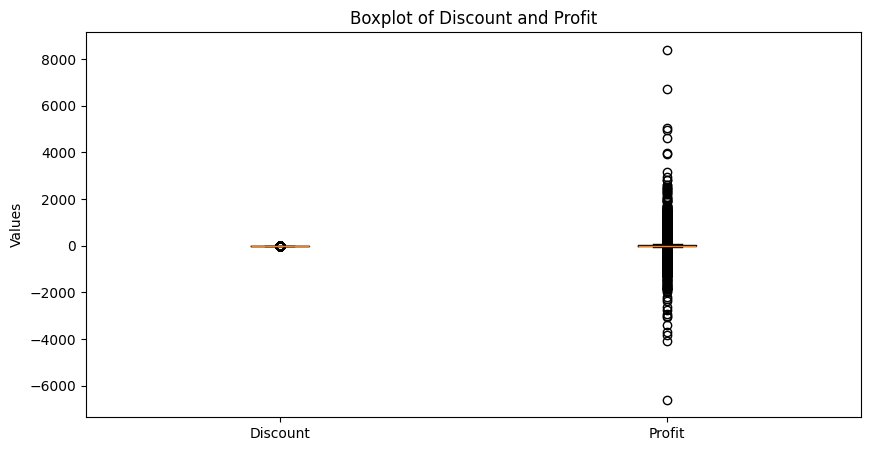

In [25]:
plt.figure(figsize = (10,5))
plt.boxplot([df['Discount'], df['Profit']], labels = ['Discount', 'Profit'])
plt.title('Boxplot of Discount and Profit')
plt.ylabel('Values')
plt.show()

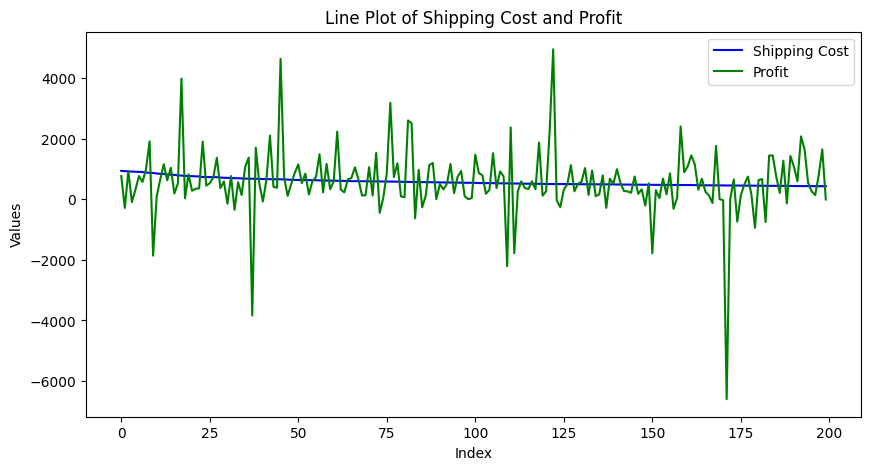

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df['Shipping Cost'][:200], label = 'Shipping Cost', color = 'blue')
plt.plot(df['Profit'][:200], label = 'Profit', color = 'green')
plt.title("Line Plot of Shipping Cost and Profit")
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

C:\Users\gkris\AppData\Local\Temp\ipykernel_2688\3403691071.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Shipping Cost'], df['Profit']], labels = ['Sales', 'Profit'])


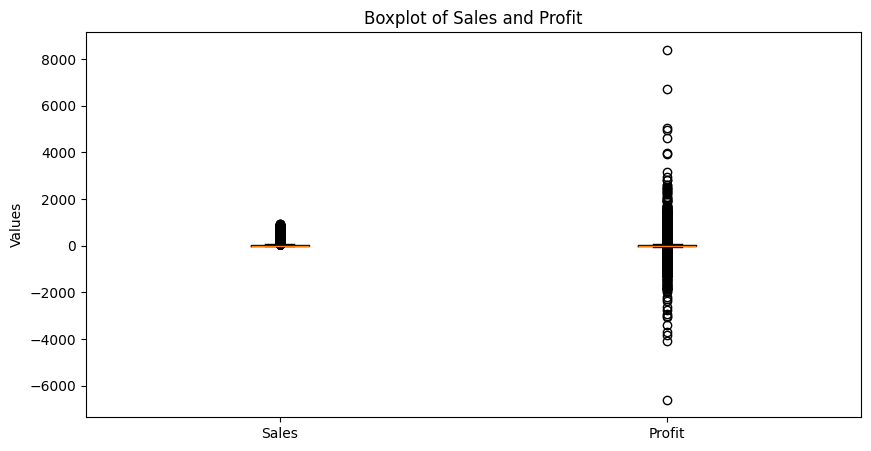

In [27]:
plt.figure(figsize = (10,5))
plt.boxplot([df['Shipping Cost'], df['Profit']], labels = ['Sales', 'Profit'])
plt.title('Boxplot of Sales and Profit')
plt.ylabel('Values')
plt.show()

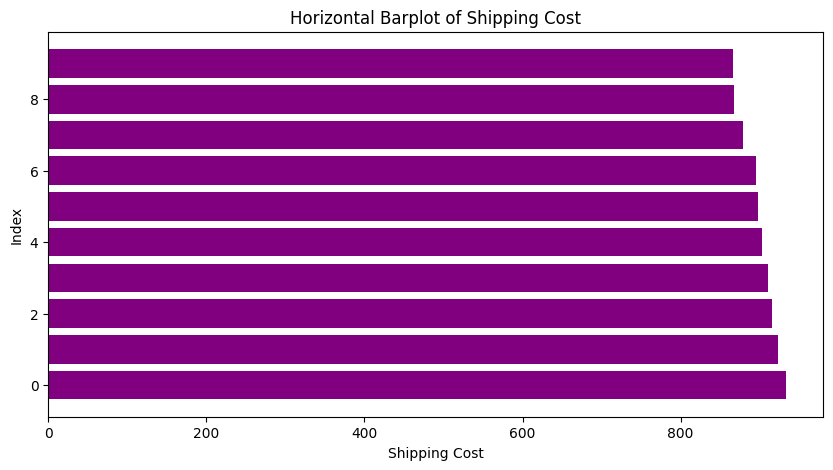

In [28]:
plt.figure(figsize  = (10,5))
plt.barh(df.index[:10], df['Shipping Cost'][:10], color = 'Purple')
plt.title('Horizontal Barplot of Shipping Cost')
plt.xlabel('Shipping Cost')
plt.ylabel('Index')
plt.show()

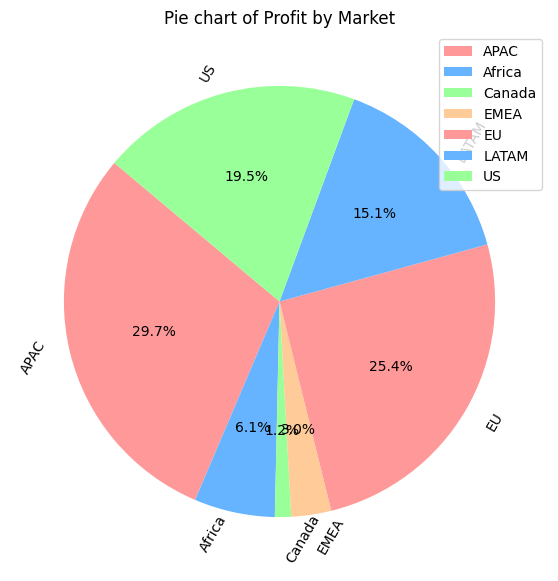

In [29]:
profit_by_market = df.groupby('Market')['Profit'].sum()

plt.figure(figsize = (7,7))
wedges, texts, autotexts = plt.pie(profit_by_market, labels = profit_by_market.index[:50], autopct = '%1.1f%%', startangle = 140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Pie chart of Profit by Market')
plt.legend()
for text in texts:
    text.set_rotation(60) 
plt.show()

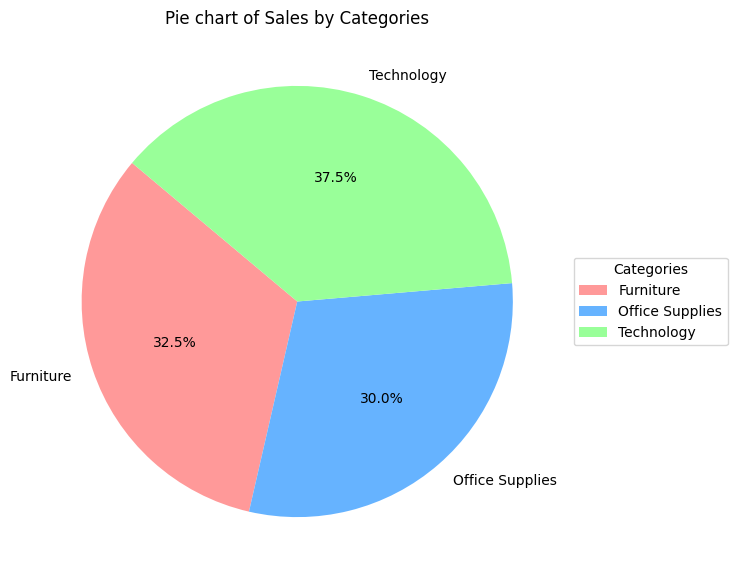

In [30]:
Sales_by_categories = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(Sales_by_categories, labels=Sales_by_categories.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99'])

plt.title('Pie chart of Sales by Categories')
plt.legend(wedges, Sales_by_categories.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

* 3D Scatter plot defines the importance of 3 columns in which one is independent and tweo are dependent columns, where it defines the relation in three dimensional space.

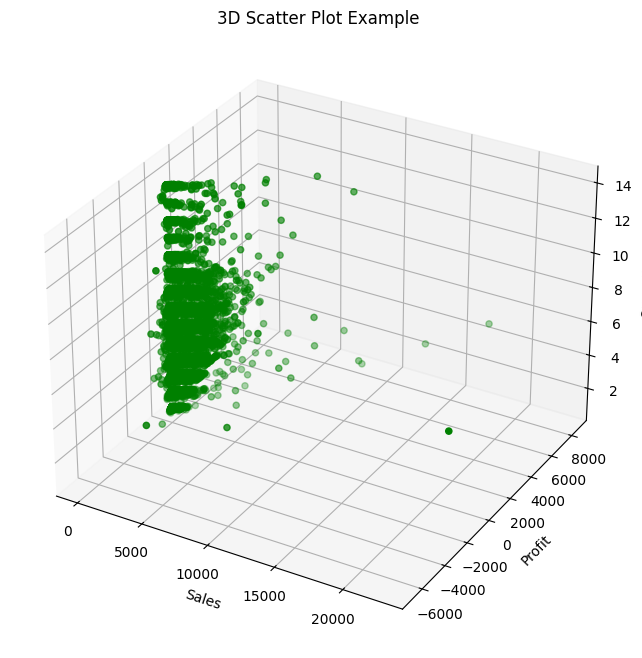

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Sales"], df["Profit"], df["Quantity"], c='g', marker='o')
ax.set_xlabel("Sales")
ax.set_ylabel("Profit")
ax.set_zlabel("Quantity")
plt.title("3D Scatter Plot Example")
plt.show()

**Step 6 : Encoding Categorical columns**

* In this dataset OneHot-Encoding is performed instead of this label encoding can also be performed on this dataset but performing onehot encoding over label provides us importance of each feature . 

In [32]:
df_cat = df.select_dtypes(include = ['object']).columns
df = pd.get_dummies(df, columns = df_cat, drop_first = True)

In [33]:
df.fillna(value = 0, inplace = True)

In [34]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Columns to perform outlier removal
columns_to_check = ['Sales', 'Quantity', 'Discount', 'Shipping Cost']

# Apply the function to the specified columns
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)

df.shape

(36156, 9504)

**Step 8 : Scaling the Numerical columns**

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
features = df.drop(columns = ['Profit'], errors = 'ignore')
features = features.apply(pd.to_numeric)

In [37]:
columns_to_scale = ['Sales', 'Quantity', 'Discount', 'Shipping Cost']
standard_scaler = StandardScaler()
df_standard_scaled = features.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(features[columns_to_scale])

In [38]:
df_final = pd.concat([df.drop(columns=columns_to_scale), df_standard_scaled[columns_to_scale]], axis=1)

**Step 9 : Splitting Data into Train and Test Columns**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
y = df['Profit']
X = df_final

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [42]:
X_train = X_train.astype(np.float64)
y_train = y_train.astype(np.float64)

**Step 10 : Performing Linear Regression**

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

In [44]:
X_train_small = X_train[:5000]
X_test_small = X_test[:5000]
y_train_small = y_train[:5000]
y_test_small = y_test[:5000]

model = LinearRegression()
model.fit(X_train_small, y_train_small)

LinearRegression()

In [45]:
model.score(X_train_small, y_train_small)

1.0

In [46]:
y_pred = model.predict(X_test_small)

In [47]:
r2 = r2_score(y_test_small, y_pred)
mae = mean_absolute_error(y_test_small, y_pred)
mse = mean_squared_error(y_test_small, y_pred)  
rmse = np.sqrt(mse)

In [48]:
print(f"R-Squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"MeanSquared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-Squared: 0.9999999993327986
Mean Absolute Error: 0.000313672912025262
MeanSquared Error: 1.062551533703688e-06
Root Mean Squared Error: 0.0010308014036193819


**Step 11 : Performing Decision Tree Regressor**

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
model = DecisionTreeRegressor()
model.fit(X_train_small, y_train_small)

DecisionTreeRegressor()

In [51]:
y_pred = model.predict(X_test_small)
r2 = r2_score(y_test_small, y_pred)
r2

0.9986452951226402